## 4th assignment NLP Part B - Question 2 - Aris Tsilifonis mtn 2323

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 4: Modify the initial version of the code in order to replace BiLSTM model with BERT pretrained languange model


We commented out the the code that was responsible for BiLSTM. Class BISTParser was defined inside model.py file

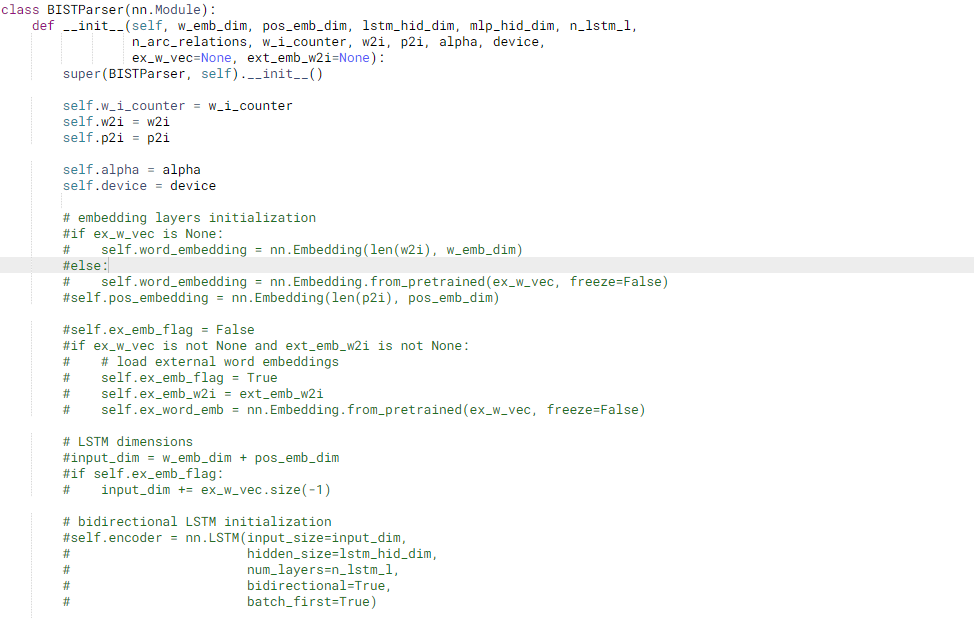

Then, we assign the BERT model to the encoder. We extract the size of the hidden layer and initialize the tokenizer of the parser with BERT Tokenizer. The input of both MLPs was adjusted to handle input from hidden layer.

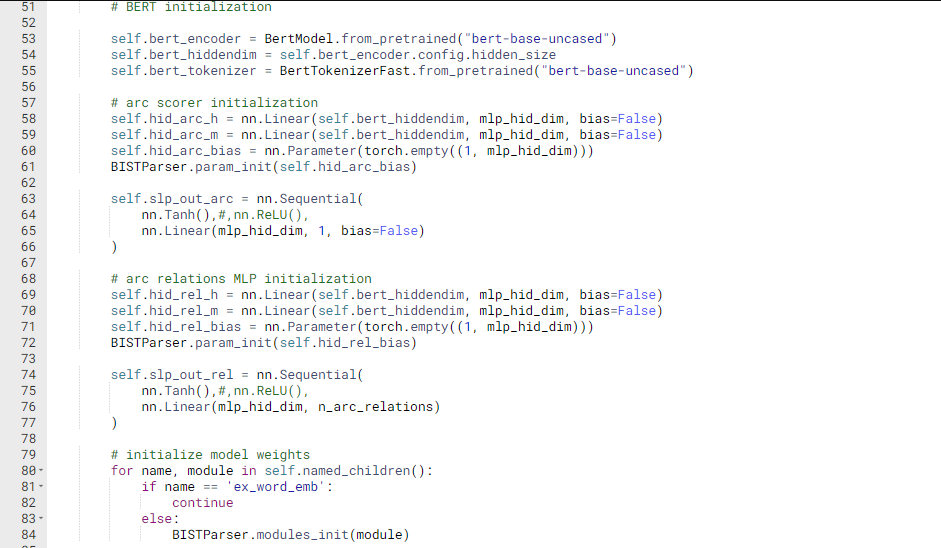

We revised the forward method to be suitable for the BERT model. The sentences are split into words. Then, they are passed to BERT tokenizer. We collect indices of the first subword for each word, as it was required by the assignment. We extract input ids and attention masks from those indices. As a result, the encoded sentence is inserted to the BERT encoder to be processed. The model returns the hidden vectors which are inputted to MLPs similarly as in the previous version of the code. We selected only the hidden states corresponding to the first subword of each word.

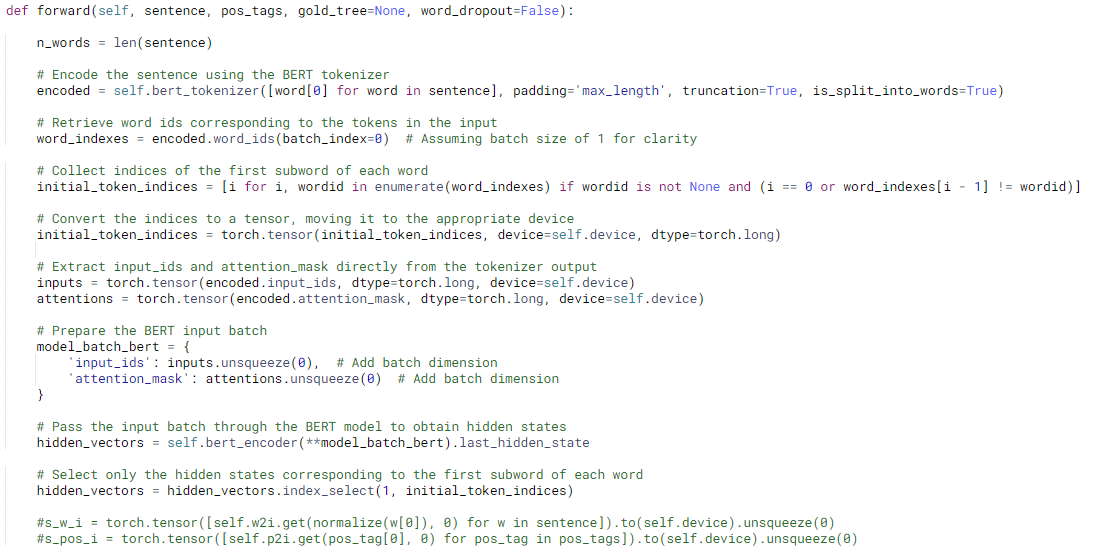

The previous version is commented out in the updated one

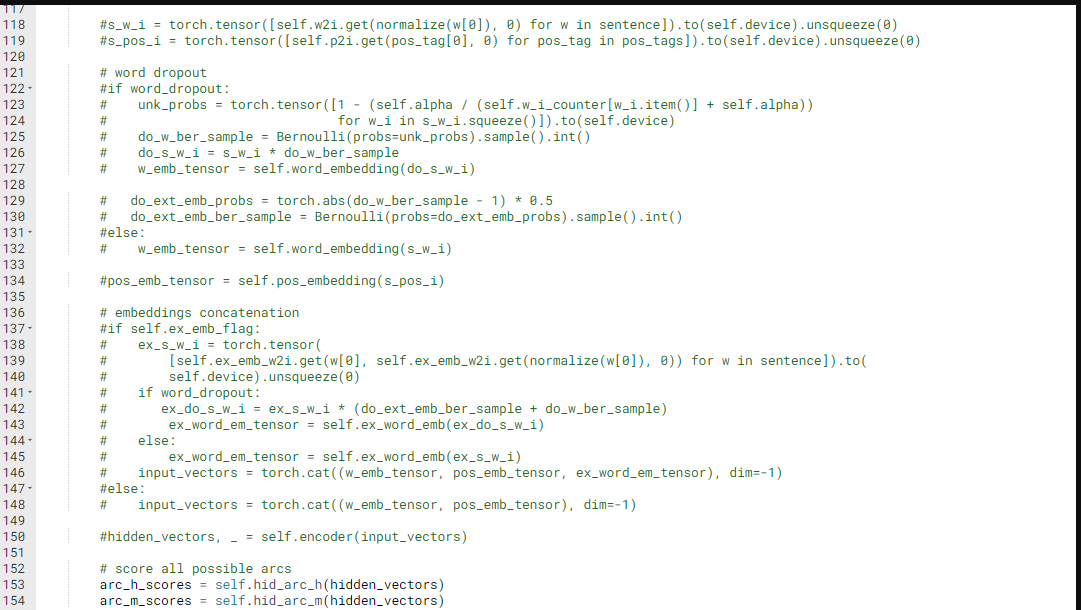

In [ ]:
os.chdir('/content/drive/MyDrive/Assignment-4-DependencyParsing/Q_B4')
!python main.py --lr 2e-5 --epochs 2

2024-06-20 01:19:13,061 - INFO - Experiment Parameters - 
{'train_path': 'data/train.conll', 'dev_path': 'data/dev.conll', 'test_path': 'data/test.conll', 'ds_name': 'ptb', 'model_dir': None, 'ext_emb': None, 'seed': 1234, 'epochs': 2, 'lr': 2e-05, 'alpha': 0.25, 'w_emb_dim': 100, 'pos_emb_dim': 25, 'lstm_hid_dim': 125, 'mlp_hid_dim': 100, 'n_lstm_layers': 2, 'no_cuda': False, 'log_interval': 2000, 'do_eval': False, 'experiment_dir': './results/ds=ptb_epochs=2_lr=2e-05_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=2_date=06_20_2024'}
2024-06-20 01:19:15,768 - INFO - Vocab statistics: words - 34327 | relations - 40 | POS tags - 19
config.json: 100% 570/570 [00:00<00:00, 2.87MB/s]
model.safetensors: 100% 440M/440M [00:01<00:00, 426MB/s]
tokenizer_config.json: 100% 48.0/48.0 [00:00<00:00, 341kB/s]
vocab.txt: 100% 232k/232k [00:00<00:00, 520kB/s]
tokenizer.json: 100% 466k/466k [00:00<00:00, 11.0MB/s]
2024-06-20 01:19:33,151 - INFO - -----------+-----------+----------

We evaluate the trained model with the --do_eval argument. We used custom learning rate(2e-5) to improve the results. Also, we reduced the number of epochs to 2 due to limitations of gpu.

In [ ]:
!python main.py --do_eval --model_dir "/content/drive/MyDrive/Assignment-4-DependencyParsing/Q_B4/results/ds=ptb_epochs=2_lr=2e-05_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=2_date=06_20_2024"

2024-06-20 04:24:04,009 - INFO - Experiment Parameters - 
{'train_path': 'data/train.conll', 'dev_path': 'data/dev.conll', 'test_path': 'data/test.conll', 'ds_name': 'ptb', 'model_dir': '/content/drive/MyDrive/Assignment-4-DependencyParsing/Q_B4/results/ds=ptb_epochs=2_lr=2e-05_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=2_date=06_20_2024', 'ext_emb': None, 'seed': 1234, 'epochs': 5, 'lr': 0.001, 'alpha': 0.25, 'w_emb_dim': 100, 'pos_emb_dim': 25, 'lstm_hid_dim': 125, 'mlp_hid_dim': 100, 'n_lstm_layers': 2, 'no_cuda': False, 'log_interval': 2000, 'do_eval': True, 'experiment_dir': '/content/drive/MyDrive/Assignment-4-DependencyParsing/Q_B4/results/ds=ptb_epochs=2_lr=2e-05_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=2_date=06_20_2024'}
2024-06-20 04:24:04,047 - INFO - Vocab statistics: words - 34327 | relations - 40 | POS tags - 19
2024-06-20 04:25:47,549 - INFO - -----------+-----------+-----------+-----------+-----------
2024-06-20 04:

Test set scores:

1.   las 94.31
2.   uas  96.07

This version of graph based dependency parser, which utilized BERT model, performs significantly better than Transition based Dependency Parser of Part A(89.10 uas). It is more efficient than the previous B version with the ReLU activation function, which achieved 92.37 las and 93.86 uas.




In [ ]:
from google.colab import runtime
runtime.unassign()

Question 5: Compare Part A and Part B

The graph based dependency parser is clearly more effective at finding dependencies between words, as it is indicated by uas scores. Initial version of transition based dependency parser attained only 89.09 unlabeled attachment score. Adding one more hidden layer did not improve substantially the uas score(only by 0.01%). The other changes reduced the efficiency of the parser.

Regarding the graph based dependency parser, the original version with BiLSTM encoder and ReLU activation function instead of tanh provided slight improvement over tanh activation. (93.76 vs 93.55 uas score). The use of pretrained embeddings instead of randomly initialized showed similar levels of improvement (93.63 vs 93.55). When we used BERT model instead of BiLSTM we noticed the most significant enhancement of the Parser (96.07 uas vs 93.55 uas)

In conclusion, Transition-based parsers generate a dependency tree by predicting a sequence of transitions(actions). The structure of this model is relatively simple. On the other hand, if false predictions happen early, later predictions can be influenced by that. An error can propagate to later stages of training, further decreasing prediction scores.

In contrast, graph based dependency parser offers a more complex approach which is more accurate than the transition based parser. Its goal is to find the dependency tree that achieves the greatest score. It attempts to develop a method for scoring dependency trees. Because it evaluates the entire sentence, it can capture more intricate dependencies than the transition-based parser. The complex structure of the code and the high running times are the main disadvatages of this version.